**НАЧАЛО**

In [1]:
import pandas as pd # ну там еще pip install 
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

Подгрузили необходимые библиотеки, теперь выведем наши данные в табличку 

In [2]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\важно\\hse_project\\flats_moscow_mod.csv', sep=';')
df

,price,totsp,livesp,kitsp,dist,metrdist
0,83,64,42,9,17.0,10
1,107,67,41,9,12.5,10
2,160,101,51,15,7.0,7
3,127,76,54,6,9.0,5
4,83,57,44,6,17.0,10
...,...,...,...,...,...,...
1525,105,78,45,10,13.0,10
1526,180,81,50,11,7.5,5
1527,81,56,39,6,11.5,10
1528,115,77,50,9,6.0,10


Проверим данные на пропуски

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1530 non-null   int64  
 1   totsp     1530 non-null   int64  
 2   livesp    1530 non-null   int64  
 3   kitsp     1530 non-null   int64  
 4   dist      1530 non-null   float64
 5   metrdist  1530 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 71.8 KB


**НУ ИИИ ВИЗУАЛИЗАЦИЯ**

Ну вроде проверили на пропуски и их нет. Давайте построим гистограммы, чтоб увидеть распределение стоимости всех квартир и квантилей

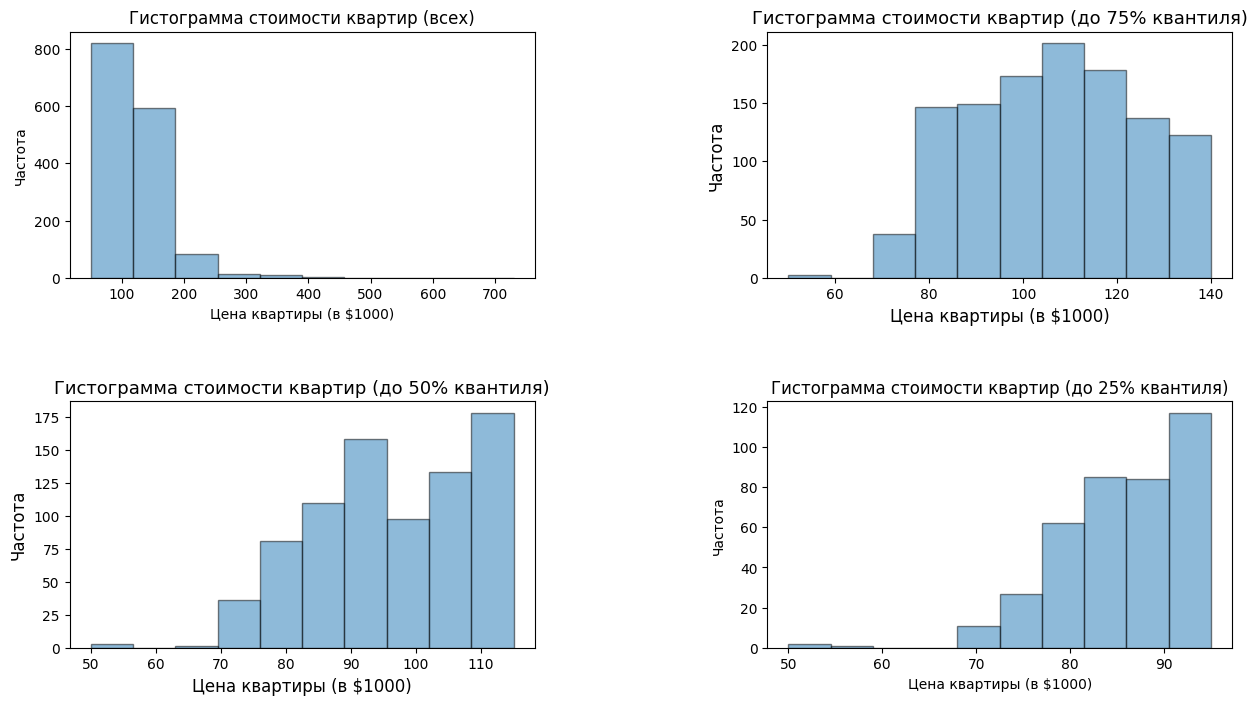

In [7]:
fig, axs = plt.subplots(2, 2, figsize = (15, 8))

axs[0, 0].hist(df['price'], edgecolor='black', alpha=0.5)
axs[0, 0].set_title('Гистограмма стоимости квартир (всех)')
axs[0, 0].set_xlabel('Цена квартиры (в $1000)')
axs[0, 0].set_ylabel('Частота')
axs[0, 1].hist(df.loc[df['price'] <= np.percentile(df['price'], 75), ['price']].copy(), edgecolor='black', alpha = 0.5) # до 75% квантиля
axs[0, 1].set_title('Гистограмма стоимости квартир (до 75% квантиля)', fontsize = 13)
axs[0, 1].set_xlabel('Цена квартиры (в $1000)', fontsize = 12)
axs[0, 1].set_ylabel('Частота', fontsize = 12)
axs[1, 0].hist(df.loc[df['price'] <= np.percentile(df['price'], 50), ['price']].copy(), edgecolor='black', alpha = 0.5) # до 50% квантиля
axs[1, 0].set_title('Гистограмма стоимости квартир (до 50% квантиля)', fontsize = 13)
axs[1, 0].set_xlabel('Цена квартиры (в $1000)', fontsize = 12)
axs[1, 0].set_ylabel('Частота', fontsize = 12)
axs[1, 1].hist(df.loc[df['price'] <= np.percentile(df['price'], 25), ['price']].copy(), edgecolor='black', alpha=0.5) # до 25% квантиля
axs[1, 1].set_title('Гистограмма стоимости квартир (до 25% квантиля)');
axs[1, 1].set_xlabel('Цена квартиры (в $1000)')
axs[1, 1].set_ylabel('Частота')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Построив гистограммы, можно сказать, что стоимость большинства квартир варьируется от 90 до 110 тысяч долларов.
Теперь посмотрим от чего же зависит стоимость квартир. Сравним цены и каждый атрибут, о котором у нас есть информация

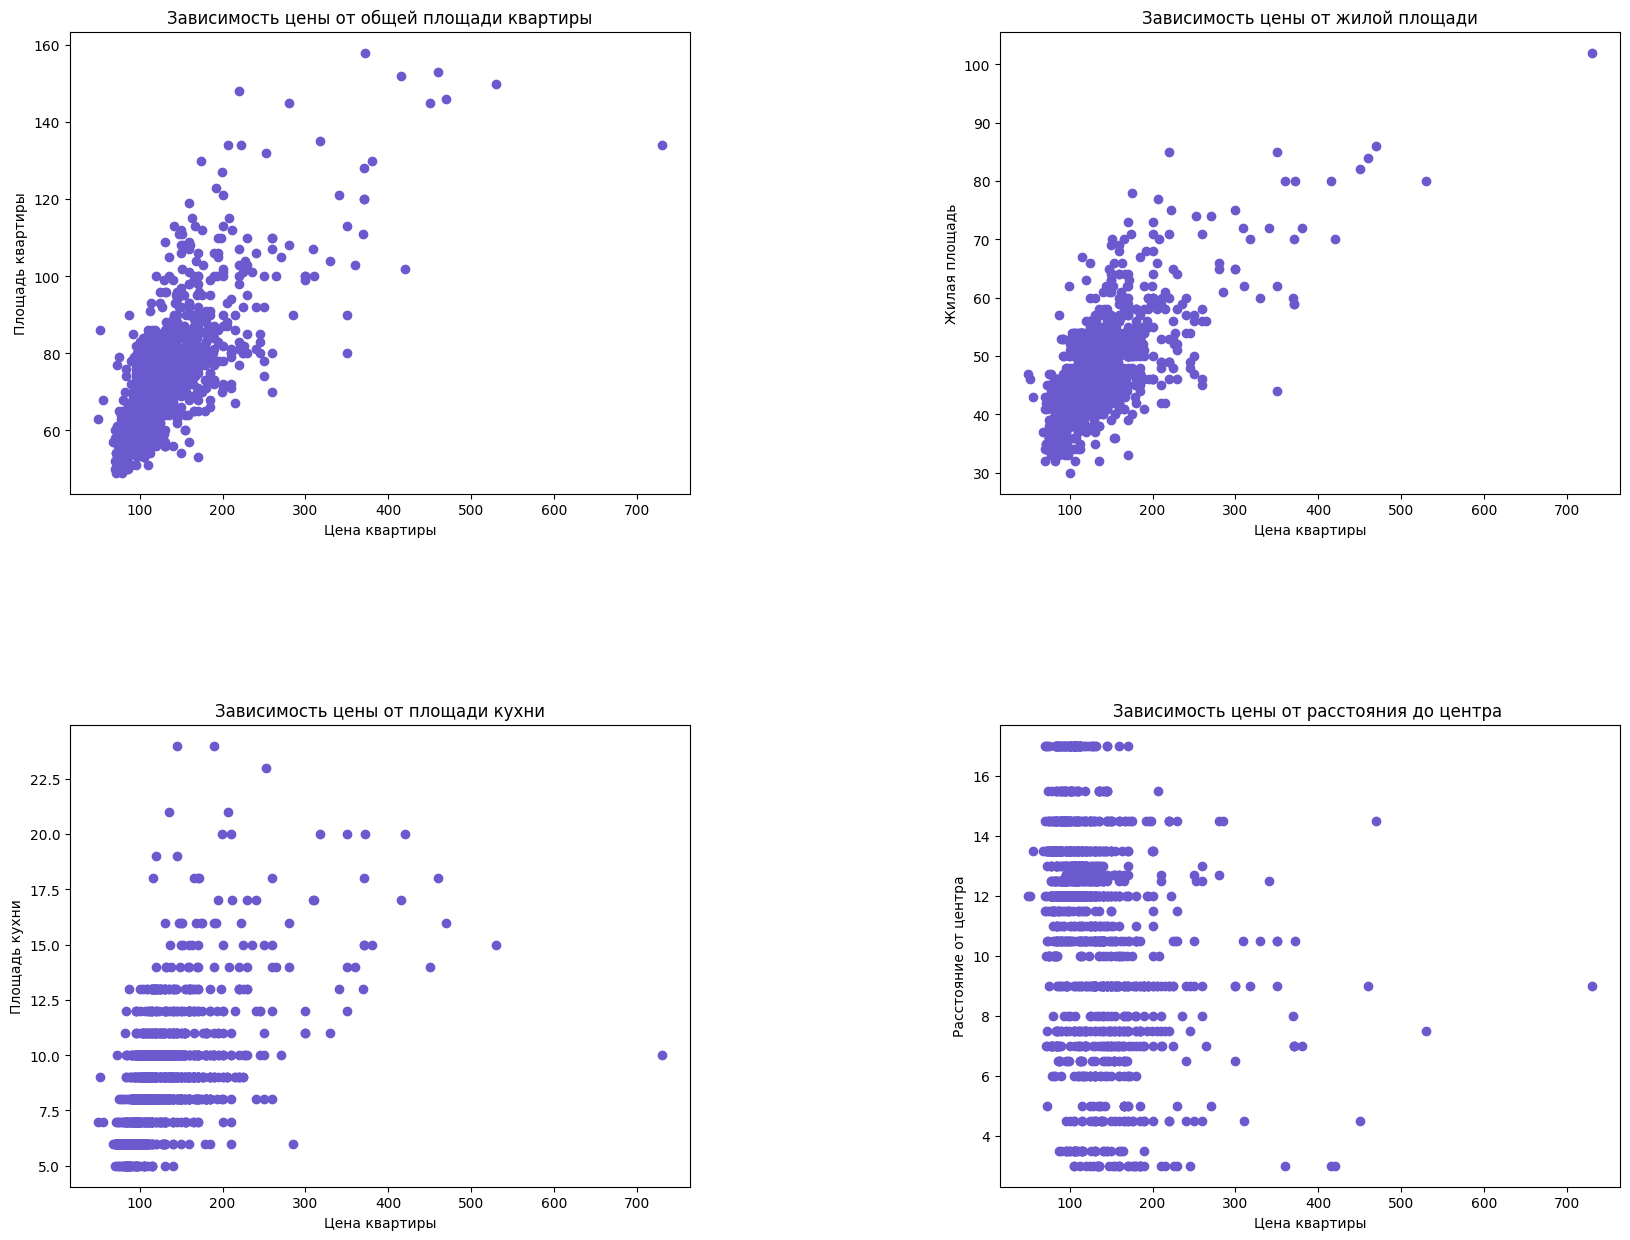

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))


ax1.scatter(df["price"], df["totsp"], color="slateblue")
ax1.set_xlabel("Цена квартиры")
ax1.set_ylabel("Площадь квартиры")
ax1.set_title("Зависимость цены от общей площади квартиры")

ax2.scatter(df["price"], df["livesp"], color="slateblue")
ax2.set_xlabel("Цена квартиры" )
ax2.set_ylabel("Жилая площадь" )
ax2.set_title("Зависимость цены от жилой площади" )

ax3.scatter(df["price"], df["kitsp"], color="slateblue")
ax3.set_xlabel("Цена квартиры" )
ax3.set_ylabel("Площадь кухни" )
ax3.set_title("Зависимость цены от площади кухни")

ax4.scatter(df["price"], df["dist"], color="slateblue")
ax4.set_xlabel("Цена квартиры")
ax4.set_ylabel("Расстояние от центра")
ax4.set_title("Зависимость цены от расстояния до центра ")#Написал расстояние до центра, ибо звучало бы неоч(от расстояния от центра), а так и звучит православно и смысл не меняется

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Зависимость цена от общей площади квартиры:
Цена увеличивается с увеличением общей площади квартиры.
Имеется умеренная корреляция.
Есть небольшие отклонения, связанные, возможно, с другими условиями.

Зависимость цены от жилой площади:
Цена увеличивается с увеличением жилой площади квартиры. 
Присутствует умеренная корреляция.
Также есть небольшие отклонения связанные, возможно, с другими условиями.
В сравнении с графиком общей площади квартиры заметной разницы не наблюдается.

Зависимость цены от площади кухни:
Цена увеличивается с увеличением площади кухни, но не сильно.
Корреляция практически отсутствует.
Есть отклонения, возможно, связанные с другими условиями, например, наличие бытовой техники и т.п, а также нужно учесть потребности покупателей (увеличение размера кухни может быть особенно привлекательным для определенных групп покупателей, таких как семьи или любители готовки.)

Зависимость цены от расстояния до центра:
Цена не сильно меняется с увеличением расстоянием от центра.
Корреляция отсутствует.
Есть отклонения, связанные, возможно, с другими условиями, например, зависимость от конкретного района и т.п.

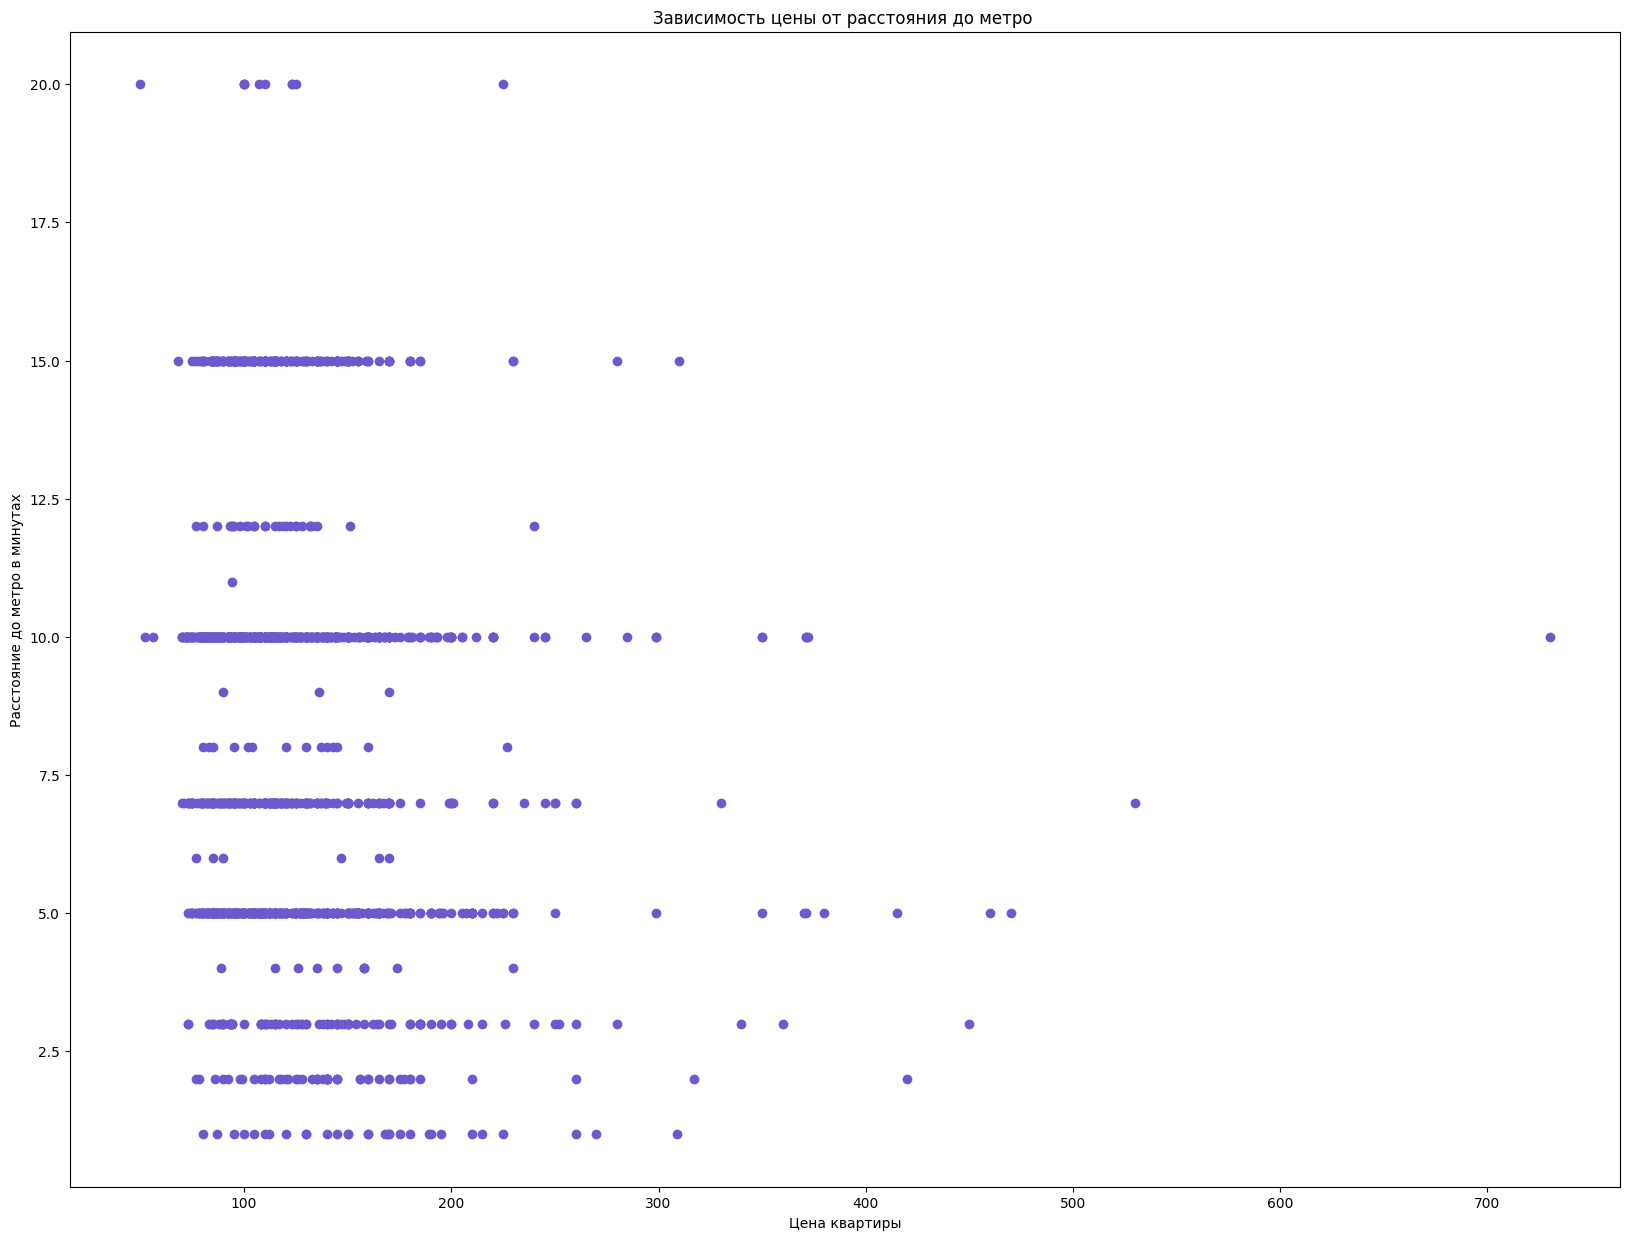

In [5]:
fig, (ax5) = plt.subplots(1, 1, figsize=(20, 15))
ax5.scatter(df["price"], df["metrdist"], color="slateblue")
ax5.set_xlabel("Цена квартиры")
ax5.set_ylabel("Расстояние до метро в минутах")
ax5.set_title("Зависимость цены от расстояния до метро ")
plt.subplots_adjust(hspace=0.5, wspace=0.5)

Зависимость цены от расстояния до метро:
Цена не сильно меняется с увеличением расстояния до метро.
Корреляция отсутствует.
Есть отклонения, связанные, возможно, с другими условиями, например, некоторой группе покупателей может быть не так важно расстояние до метро.

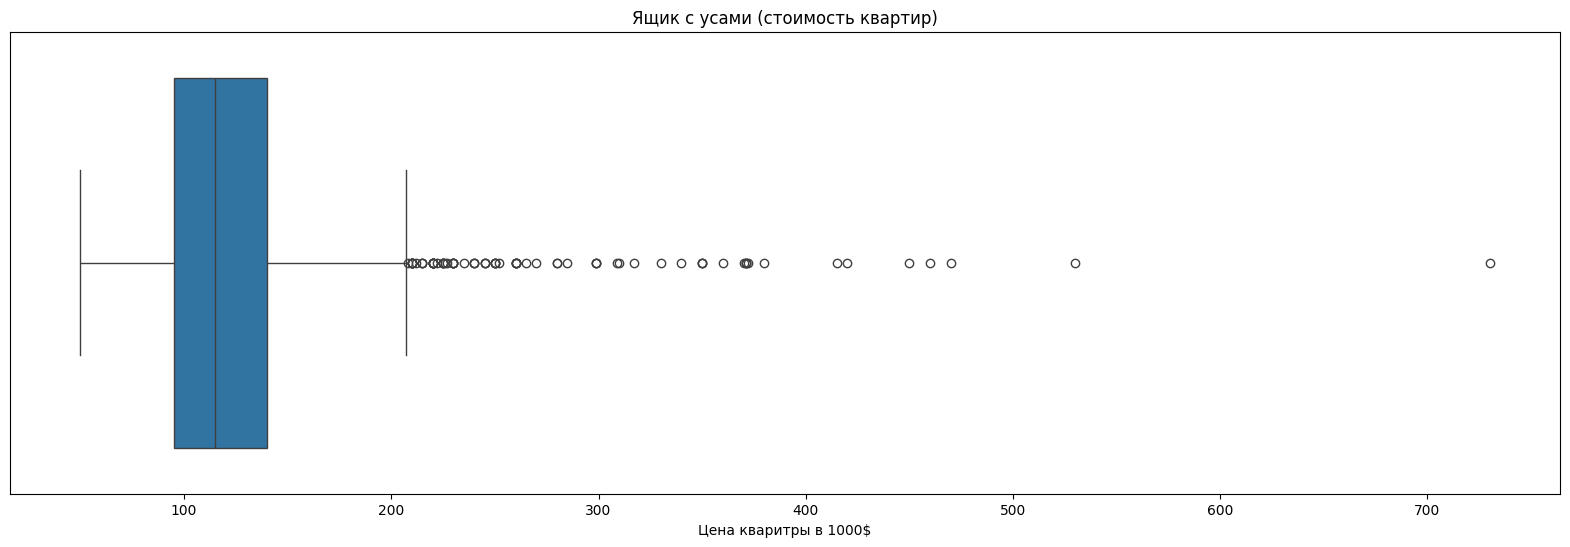

In [6]:
plt.figure(figsize = (20,6))
plt.title('Ящик с усами (стоимость квартир)')
plt.xlabel('Цена кваритры в 1000$')
sns.boxplot(df['price'], orient = 'h')
plt.yticks([]);

Видим ящик с усами, показывающий что цены квартир более 200 000$ это выбросы 

Украл идею у прошлых курсов о разделении квартир на разные категории стоимости

In [7]:
# Cоздадим новые датафреймы.

iqr = np.percentile(df['price'], 75) - np.percentile(df['price'], 25)
df_main = df[df['price'] < np.percentile(df['price'], 75) + 1.5 * iqr]
df_elite = df[df['price'] >= np.percentile(df['price'], 75) + 1.5 * iqr]

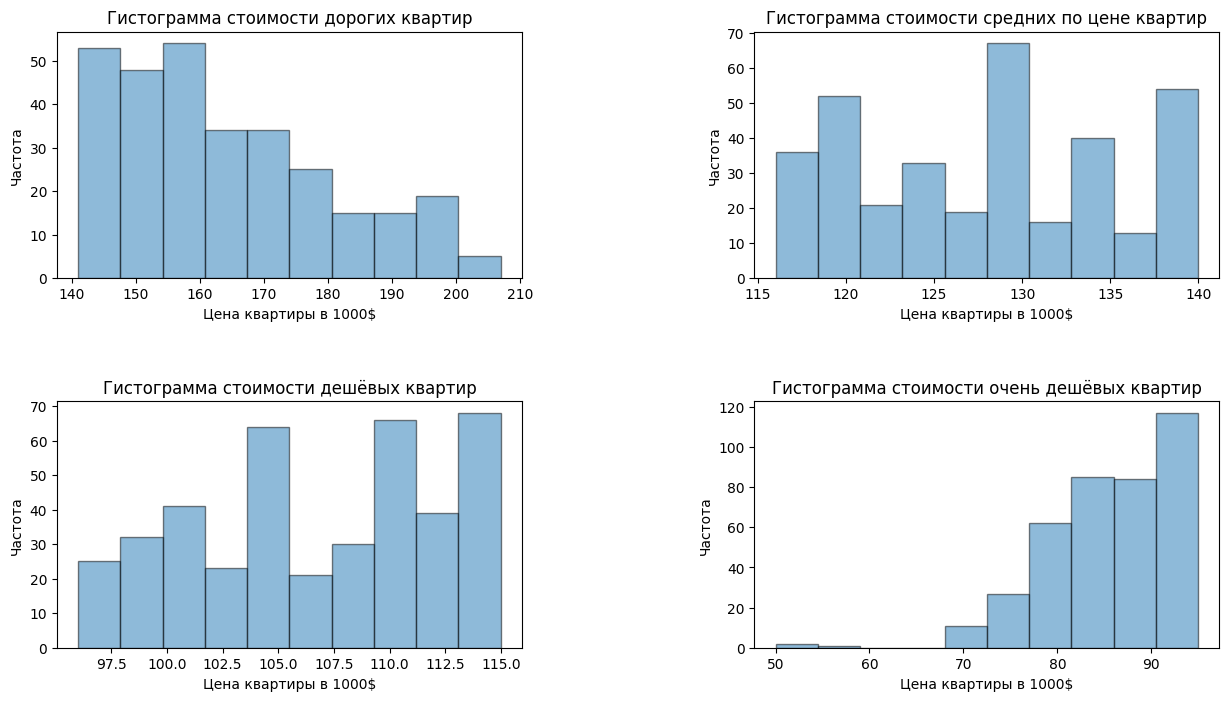

In [8]:
fig, axs = plt.subplots(2, 2, figsize = (15, 8))

axs[0, 0].hist(df.loc[(df['price'] > np.percentile(df['price'], 75)) & (df['price'] <= np.percentile(df['price'], 75) + 1.5 * iqr), ['price']].copy(), edgecolor='black', alpha = 0.5) # 
axs[0, 0].set_title('Гистограмма стоимости дорогих квартир')
axs[0, 0].set_xlabel('Цена квартиры в 1000$')
axs[0, 0].set_ylabel('Частота')
axs[0, 1].hist(df.loc[(df['price'] > np.percentile(df['price'], 50)) & (df['price'] <= np.percentile(df['price'], 75)), ['price']].copy(), edgecolor='black', alpha = 0.5) 
axs[0, 1].set_title('Гистограмма стоимости средних по цене квартир', )
axs[0, 1].set_xlabel('Цена квартиры в 1000$')
axs[0, 1].set_ylabel('Частота')
axs[1, 0].hist(df.loc[(df['price'] > np.percentile(df['price'], 25)) & (df['price'] <= np.percentile(df['price'], 50)), ['price']].copy(), edgecolor='black', alpha = 0.5)
axs[1, 0].set_title('Гистограмма стоимости дешёвых квартир')
axs[1, 0].set_xlabel('Цена квартиры в 1000$')
axs[1, 0].set_ylabel('Частота')
axs[1, 1].hist(df.loc[df['price'] <= np.percentile(df['price'], 25), ['price']].copy(), edgecolor='black', alpha = 0.5)
axs[1, 1].set_title('Гистограмма стоимости очень дешёвых квартир');
axs[1, 1].set_xlabel('Цена квартиры в 1000$')
axs[1, 1].set_ylabel('Частота')

plt.subplots_adjust(hspace= 0.5, wspace= 0.5)

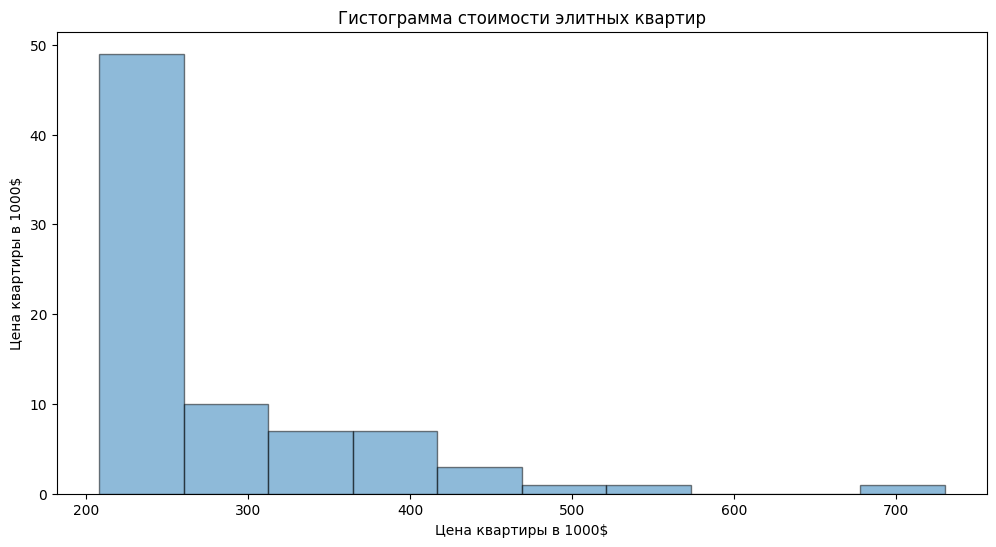

In [9]:
plt.figure(figsize = (12,6))
plt.hist(df_elite['price'], edgecolor = 'black', alpha = 0.5)
plt.title('Гистограмма стоимости элитных квартир')
plt.xlabel('Цена квартиры в 1000$')
plt.ylabel('Цена квартиры в 1000$');

Построив гистограммы стоимости квартир по разным категориям стоимости, можно сказать, что средняя стоимость дорогих квартир от 140 до 160 тысяч долларов, средняя стоимость средних квартир 130 тысяч долларов, средняя стоимость дешевых квартир 110 тысяч долларов, средняя стоимость очень дешевых квартир от 90 до 100 тысяч долларов.
Можно заметить, что на гистограммах стоимости средних по цене и дешевых квартир присутствует широкий разброс цен.

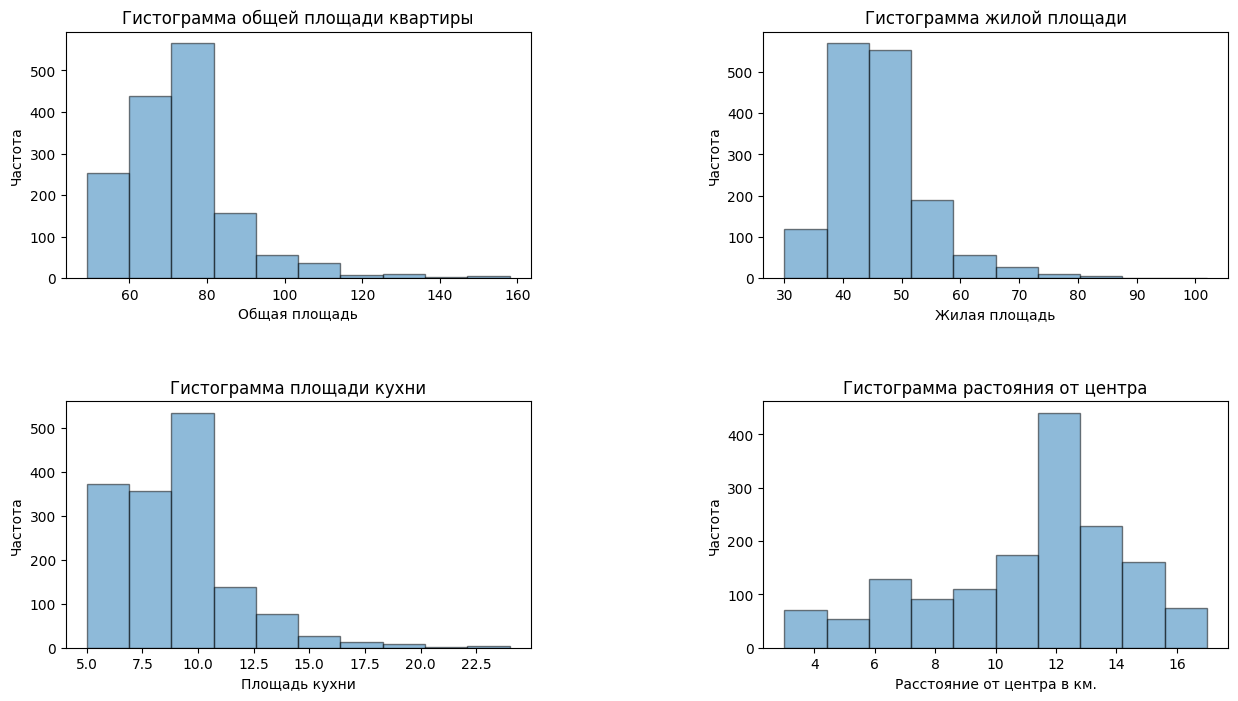

In [10]:
# Посмотрим на гистограмму общей площади/жилойплощади/кухни/расстояния. Вдруг увидим что-то еще. 
fig, axs = plt.subplots(2, 2, figsize = (15, 8))

axs[0, 0].hist(df['totsp'], edgecolor='black', alpha=0.5)
axs[0, 0].set_title('Гистограмма общей площади квартиры')
axs[0, 0].set_xlabel('Общая площадь')
axs[0, 0].set_ylabel('Частота')
axs[0, 1].hist(df['livesp'], edgecolor='black', alpha=0.5)
axs[0, 1].set_title('Гистограмма жилой площади')
axs[0, 1].set_xlabel('Жилая площадь')
axs[0, 1].set_ylabel('Частота')
axs[1, 0].hist(df['kitsp'], edgecolor='black', alpha=0.5)
axs[1, 0].set_title('Гистограмма площади кухни')
axs[1, 0].set_xlabel('Площадь кухни')
axs[1, 0].set_ylabel('Частота')
axs[1, 1].hist(df['dist'], edgecolor='black', alpha=0.5)
axs[1, 1].set_title('Гистограмма растояния от центра');
axs[1, 1].set_xlabel('Расстояние от центра в км.')
axs[1, 1].set_ylabel('Частота')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

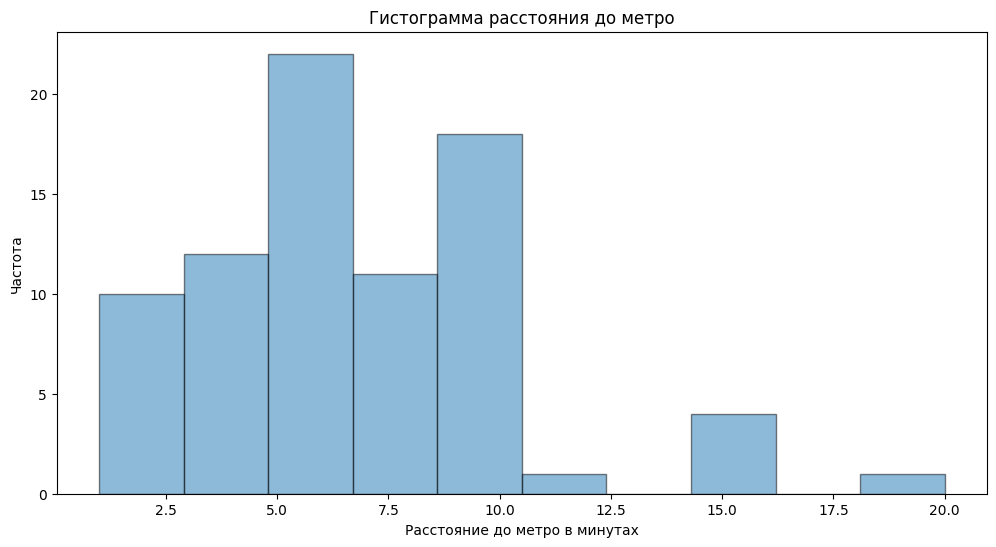

In [11]:
plt.figure(figsize = (12,6))
plt.hist(df_elite['metrdist'], edgecolor = 'black', alpha = 0.5)
plt.title('Гистограмма расстояния до метро')
plt.xlabel('Расстояние до метро в минутах')
plt.ylabel('Частота');

**ГИПОТЕЗЫ**

Гипотезы, которые будем проверять:
Увеличение расстояния до метро и до центра уменьшают цену квартиры(ну вроде в центре кв должны быть дороже, логично?),а площадь (будь то жилая, общая или кухни) чем больше, тем квартиры дороже.

Разделим выборку на обучающую и тестовую  случайным образом (хз, как создатели датасета упорядочили объекты);. Фиксируем  `random_state`.

In [12]:
from sklearn.model_selection import train_test_split
y = df['price'].values
X = df.drop(labels=['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=3)
X_train = X_train.values
X_test = X_test.values
# Выведем размеры полученных выборок
print("Размер обучающей выборки (X_train):", X_train.shape)
print("Размер тестовой выборки (X_test):", X_test.shape)
print("Размер обучающей выборки (y_train):", y_train.shape)
print("Размер тестовой выборки (y_test):", y_test.shape)

Размер обучающей выборки (X_train): (1071, 5)
Размер тестовой выборки (X_test): (459, 5)
Размер обучающей выборки (y_train): (1071,)
Размер тестовой выборки (y_test): (459,)


Построим с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

In [13]:
a = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
columns_names = df.columns[1:]
for i in range(a.size):
  print("coefs for " + str(columns_names[i]) + " " + str(a[i]))

coefs for totsp 1.9326799093321796
coefs for livesp 0.5729426804458956
coefs for kitsp 1.371125254936216
coefs for dist -3.629651038861728
coefs for metrdist -1.509730989510889


Ну в целом получается как и предполагалось: коэф отрицательный, цена будет меньше при большем расстоянии, в случае с метро так же, чем дальше, тем дешевле. А по площади квартиры и комнат увеличивается цена, что логично, поэтому и коэф положительный. Особенно сильно влияет расстояние от центра, а меньше всего жилая площадь

Оценим качество приближения, вычислив среднеквадратическую ошибку на тестовой.

In [14]:
pred = X_test @ a
mse = np.mean((pred - y_test)**2)
print(mse)

1247.5826480591356


**ДЕЛАЕМ МОДЕЛЬ СЛОЖНЕЕ**

Цена квартиры не обязательно зависит от всех характеристик именно линейно. Зависимость может быть разной квадратичной или логарифмической, еще могут быть важны не только отдельные признаки, но и комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик
Добавим признак расстояние до метро * расстояние до центра(dist_mul), т.к. оба они влекут увеличение цены, и коэффициент расстояние до центра делить на площадь квартиры(dis_div_sp)

In [15]:
X = df.drop(labels=['price'], axis=1)
X.insert(5, "dist_mul", X["dist"].values * X["metrdist"].values, True)
X.insert(6, "dist_div_sp", X["dist"].values / X["totsp"].values, True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=72)
X_train = X_train.values
X_test = X_test.values
a = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
columns_names = X.columns
for i in range(a.size):
  print("coefs for " + str(columns_names[i]) + " " + str(a[i]))

coefs for totsp 2.40046891623367
coefs for livesp 0.7523834206162467
coefs for kitsp 0.5243899919232565
coefs for dist -10.860178923885913
coefs for metrdist -5.094756116994175
coefs for dist_mul 0.323447104909734
coefs for dist_div_sp 286.0954307610893


не опять, а снова чекаем mse

In [16]:
pred = X_test @ a
mse = np.mean((pred - y_test)**2)
print(mse)

693.6481822462662


меньше = круто

**проверка качества модели**

In [17]:
from sklearn.linear_model import LinearRegression
# Создание объекта модели линейной регрессии
model = LinearRegression()

# Обучение модели на данных
model.fit(X_train, y_train)

# Прогнозирование значений на тестовых данных
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

18.06326388046847

средняя абсолютная ошибка показывает среднее отклонение прогнозируемых значений от фактических. Значение 18 означает, что в среднем прогнозируемые значения отклоняются от фактических на 18 единиц.

In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

723.8949229121276

723 означает, что в среднем прогнозируемые значения отклоняются от фактических на 723 единицы в квадрате.

In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.6267743189199169

63% вариабельности данных объясняется моделью.

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.14008339146580134

 в среднем прогнозируемые значения отклоняются на 14% от фактических значений.